

$$
z^{(k)} = \theta^T x^{(k)}
$$

$$ 
h(z^{(k)}) = \frac {1} {1 + e^{-z^{(k)}}}
$$


$$
J = \frac{1}{m} \sum_{k=1}^{m} -y^{(k)} log(h(z^{(k)})) - (1 - y^{(k)}) log(1 - h(z^{(k)}))
$$

$$
\frac{\partial J}{\partial \theta_{i}} = \frac {1}{m} \sum_{k=1}^{m} (h(z^{(k)}) - y^{{(k)}}) x_{i}^{(k)} 
=  \frac {1}{m} \sum_{k=1}^{m} (\hat{y^{(k)}} - y^{(k)}) x_{i}^{(k)}
$$

$$
vectorized: \Delta J = \frac {1}{m}  X^T (\hat{y} - y)
$$

$$
H_{ij} = \frac{1}{m} \sum_{k=1}^{m} h(z^{(k)})\big(1 - h(z^{(k)})\big) x_i^{(k)} x_j^{(k)}
$$

$$
vectorized: H = \frac{1}{m} X^T diag\{{h(X)(1 - h(X))}\}_{m \times m} X
$$



Second order Taylor expansion at $\theta^{(k)}$

$$
f(\theta) = f(\theta^{(k)}) + f\prime ({\theta^{(k)}}) (\theta - \theta^{(k)}) + \frac {f\prime\prime(\theta^{(k)}) (\theta - \theta^{(k)})^{2}}{2}
$$

then
$$
f'(\theta) = f\prime(\theta^{(k)}) + f\prime\prime(\theta^{(k)})(\theta - \theta^{(k)})
$$

let $f'(\theta) = 0$ ,
that is 
$$
0 = f\prime(\theta^{(k)}) + f\prime\prime(\theta^{(k)})(\theta - \theta^{(k)})
$$

then
$$
-f\prime(\theta^{(k)}) = f\prime\prime(\theta^{(k)})(\theta - \theta^{(k)})
$$
so, we got

$$
\theta = \theta^{(k)} - f\prime\prime(\theta^{(k)})^{-1} f\prime(\theta^{(k)}) 
$$

Note that
$f\prime\prime(\theta^{(k)})$ is called Hessian matrix $H$

$f\prime(\theta^{(k)})$ is the partiall derivative of $f$ at point $\theta^{(k)}$ $\frac {\partial f} {\partial \theta} $

just rewrite the above formula
$$
\theta = \theta^{(k)} - H^{-1}\frac{\partial f}{\partial \theta}\mid_{\theta = \theta^{(k)}}
$$

Fine, now we can use the above formula to maximum or minimum our functions. Such method is called newton's method.

Newton's method addresses getting to $f(\theta) = 0$, and minimizing $J(\theta)$ means getting $\frac{\partial J}{\partial \theta}$ to 0. There after applying Newton's method, extending it to multidimensional setting (Newton-Raphson method), the update rule becomes:

\begin{align*}
\theta &:= \theta - \frac{\partial J(\theta) / \partial \theta} {H} \\
       &:= \theta - \frac{\nabla_{\theta} J(\theta)} {H} \\
       &:= \theta - H^{-1} \nabla_{\theta} J(\theta)
\end{align*}

[[-2.6205116 ]
 [ 0.76037154]
 [ 1.17194674]]


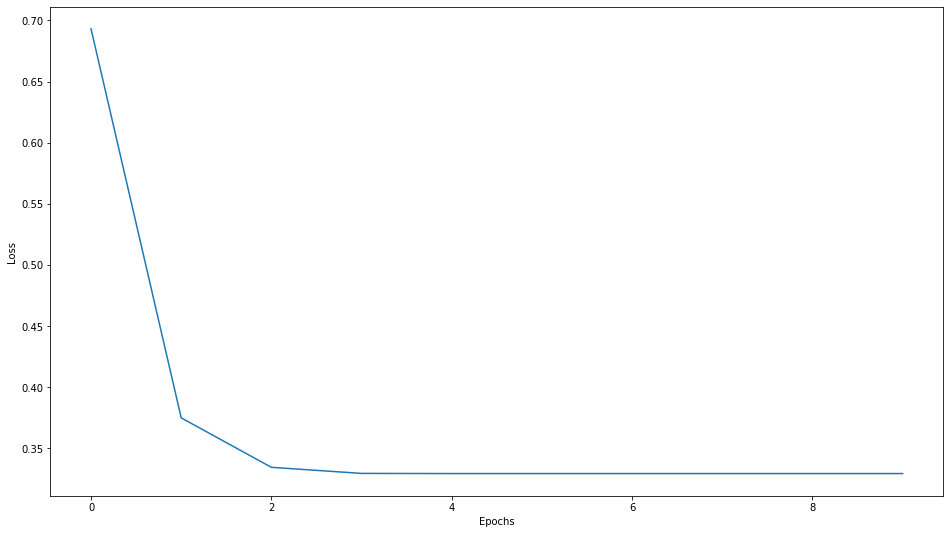

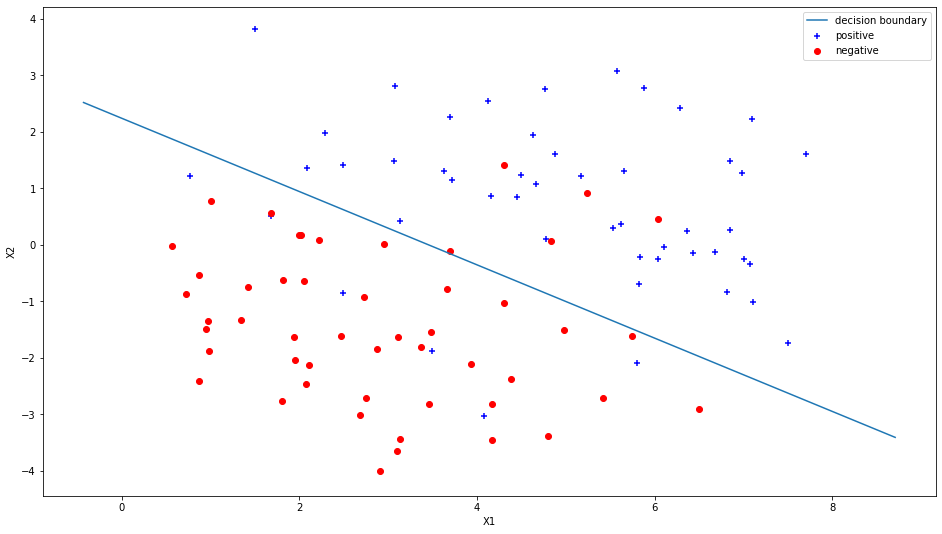

In [24]:
# using newton's method to solve logistic regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = np.loadtxt('logistic_x.txt')
y = np.loadtxt('logistic_y.txt').astype('int32')
y[y == -1] = 0

x_min = np.min(x[:, 0]) - 1
x_max = np.max(x[:, 0]) + 1
x_range = np.linspace(x_min, x_max, 20)

xx = np.c_[np.ones(len(x)), x]
yy = np.reshape(y, (-1, 1))

pos_dataset = x[y == 1]
neg_dataset = x[y != 1]

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

num_iterate = 10
m = len(xx) # number of samples
n = len(xx[0]) # number of features
epsilon = 1e-6
costs = []

theta = np.zeros((3, 1))

for i in range(num_iterate):
    z = xx @ theta
    y_hat = sigmoid(z)
    cost = -(yy.T @ np.log(y_hat + epsilon) + (1 - yy.T) @ np.log(1 - y_hat + epsilon)) / len(xx)
    costs.append(cost.flatten())
    y_hat_flatten = y_hat.flatten()
    delta_theta = (xx.T @ (y_hat - yy)) / m
    hessian = (xx.T @ np.diag(y_hat_flatten * (1 - y_hat_flatten)) @ xx) / m
    theta = theta - np.linalg.inv(hessian) @ delta_theta
print(theta)
theta = theta.flatten()
y_hat = -(theta[0] + theta[1] * x_range) / theta[2]  


plt.figure(figsize=(16, 9))
plt.plot(costs)
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.figure(figsize=(16, 9))
plt.scatter(pos_dataset[:, 0], pos_dataset[:, 1], marker='+', color='blue', label='positive')
plt.scatter(neg_dataset[:, 0], neg_dataset[:, 1], marker='o', color='red', label='negative')
plt.plot(x_range, y_hat, label='decision boundary')
plt.xlabel('X1')
plt.ylabel('X2')

plt.legend()

[[-2.62007304]
 [ 0.76027509]
 [ 1.1719145 ]]


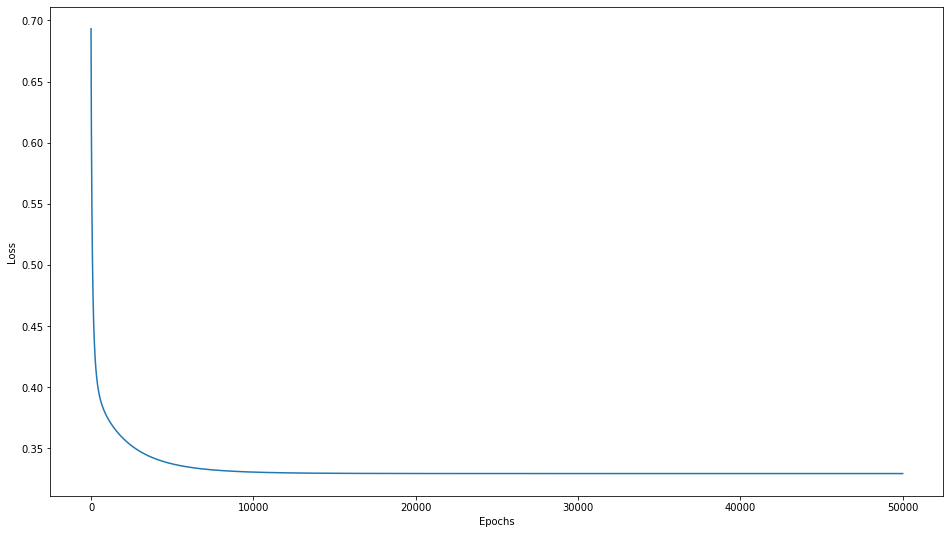

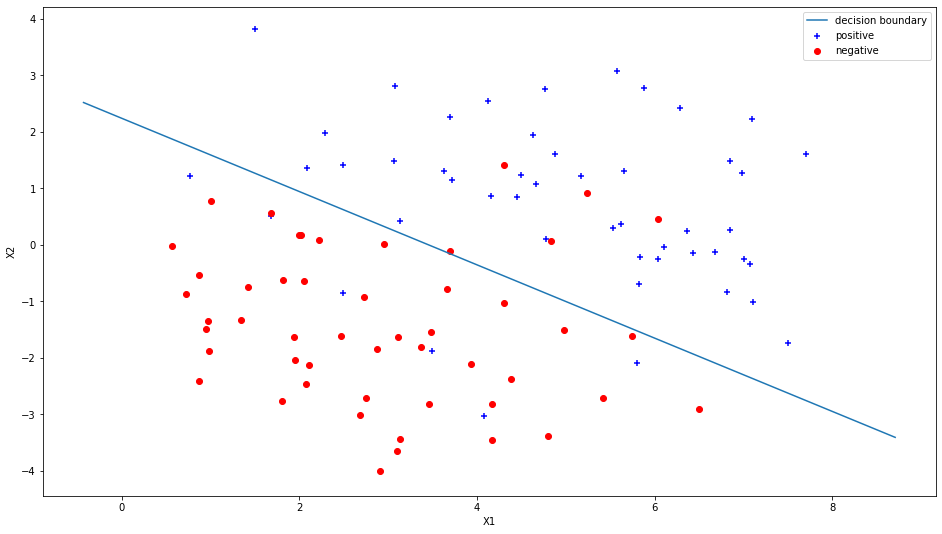

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = np.loadtxt('logistic_x.txt')
y = np.loadtxt('logistic_y.txt').astype('int32')
y[y == -1] = 0

x_min = np.min(x[:, 0]) - 1
x_max = np.max(x[:, 0]) + 1
x_range = np.linspace(x_min, x_max, 20)

xx = np.c_[np.ones(len(x)), x]
yy = np.reshape(y, (-1, 1))

pos_dataset = x[y == 1]
neg_dataset = x[y != 1]

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

num_iterate = 50000
alpha = 0.01
theta = np.zeros((3, 1))
epsilon = 1e-6
costs = []

for i in range(num_iterate):
    z = xx @ theta
    y_hat = sigmoid(z)
    error = y_hat - yy
    cost = -(yy.T @ np.log(y_hat + epsilon) + (1 - yy.T) @ np.log(1 - y_hat + epsilon)) / len(xx)
    costs.append(cost.flatten())
    theta = theta - alpha * (xx.T @ error) / len(xx)
    
print(theta)
theta = theta.flatten()
y_hat = -(theta[0] + theta[1] * x_range) / theta[2]  


plt.figure(figsize=(16, 9))
plt.plot(costs)
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.figure(figsize=(16, 9))
plt.scatter(pos_dataset[:, 0], pos_dataset[:, 1], marker='+', color='blue', label='positive')
plt.scatter(neg_dataset[:, 0], neg_dataset[:, 1], marker='o', color='red', label='negative')
plt.plot(x_range, y_hat, label='decision boundary')
plt.xlabel('X1')
plt.ylabel('X2')

plt.legend()

Note that the above two methods get the nearly same result.

the theta from method 1 (10 times iteration) :[[-2.6205116 ]
 [ 0.76037154]
 [ 1.17194674]]
 
the theta from method2 (50000 times iteratioin) : [[-2.62007304]
 [ 0.76027509]
 [ 1.1719145 ]]